In [1]:
import requests
import pandas as pd
import numpy as np


In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [3]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

Making dataframes:

In [4]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

Contents of Dataframes:

In [5]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,None,232223,0,0,0,0,0,4,None,...,None,None,None,None,None,None,None,None,0.00,0.00
1,NaN,None,58822,0,0,0,0,0,2,None,...,None,None,None,None,None,None,None,None,0.81,0.00
2,NaN,None,153256,0,0,0,0,0,3,None,...,None,None,None,None,None,None,None,None,0.81,0.00
3,NaN,None,438098,0,0,0,0,0,3,None,...,None,None,None,None,None,None,None,None,0.54,0.36
4,NaN,None,226597,0,0,0,0,0,2,None,...,None,None,None,None,None,None,None,None,1.00,0.37


In [6]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],66
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],190
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],245
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],73


In [7]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

Making a copy of the Dataframe with only the important columns

In [101]:
slim_elements_df = elements_df[['web_name','team','element_type','selected_by_percent','now_cost','value_season','total_points', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 
       'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded']]

In [102]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,Balogun,1,4,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00
1,Cédric,1,2,0.0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83
2,M.Elneny,1,3,0.0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29
3,Fábio Vieira,1,3,0.0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28
4,Gabriel,1,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84


Map the position name from 'element_type_df' to 'slim_elements_df'

In [103]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\SOBAN\AppData\Local\Temp\ipykernel_16100\1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [104]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position
0,Balogun,1,4,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Forward
1,Cédric,1,2,0.0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83,Defender
2,M.Elneny,1,3,0.0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29,Midfielder
3,Fábio Vieira,1,3,0.0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28,Midfielder
4,Gabriel,1,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender


Similarly add teams:

In [105]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\SOBAN\AppData\Local\Temp\ipykernel_16100\2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [106]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position
0,Balogun,Arsenal,4,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Forward
1,Cédric,Arsenal,2,0.0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83,Defender
2,M.Elneny,Arsenal,3,0.0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29,Midfielder
3,Fábio Vieira,Arsenal,3,0.0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28,Midfielder
4,Gabriel,Arsenal,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender


Create New Column called 'value' because value_season contains some strings:

$value = points/cost$

In [107]:
slim_elements_df['value'] = slim_elements_df['total_points']/slim_elements_df['now_cost']

C:\Users\SOBAN\AppData\Local\Temp\ipykernel_16100\1005271124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df['total_points']/slim_elements_df['now_cost']


In [108]:
slim_elements_df['value']

0      0.000000
1      0.250000
2      0.133333
3      0.727273
4      2.920000
         ...   
569    0.540000
570    0.000000
571    1.666667
572    0.955556
573    0.311111
Name: value, Length: 574, dtype: float64

In [109]:
slim_elements_df[slim_elements_df['team']=='Man Utd']

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
369,Alex Telles,Man Utd,2,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Defender,0.000000
370,Amad,Man Utd,3,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Midfielder,0.000000
371,Antony,Man Utd,3,0.0,70,0.0,82,4,2,12,21,6.65,2.42,9.07,25.37,Midfielder,1.171429
372,B.Fernandes,Man Utd,3,0.0,85,0.0,176,8,9,18,39,9.33,10.70,20.03,49.13,Midfielder,2.070588
373,B.Williams,Man Utd,2,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Defender,0.000000
374,Bailly,Man Utd,2,0.0,40,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Defender,0.000000
375,Casemiro,Man Utd,3,0.0,55,0.0,87,4,3,10,22,3.49,3.82,7.31,29.30,Midfielder,1.581818
376,Dalot,Man Utd,2,0.0,50,0.0,102,1,2,10,34,2.49,1.53,4.02,34.27,Defender,2.040000
377,Elanga,Man Utd,3,0.0,50,0.0,23,0,1,2,2,0.65,0.98,1.63,4.79,Midfielder,0.460000
378,Eriksen,Man Utd,3,0.0,60,0.0,103,1,9,13,25,4.79,3.49,8.28,26.02,Midfielder,1.716667


In [110]:
max(slim_elements_df['value_season'])

'0.0'

In [111]:
#slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

In [112]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
0,Balogun,Arsenal,4,0.0,45,0.0,0,0,0,0,0,0.00,0.00,0.00,0.00,Forward,0.000000
1,Cédric,Arsenal,2,0.0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83,Defender,0.250000
2,M.Elneny,Arsenal,3,0.0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29,Midfielder,0.133333
3,Fábio Vieira,Arsenal,3,0.0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28,Midfielder,0.727273
4,Gabriel,Arsenal,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000


In [113]:
max(slim_elements_df['value'])

3.32

Sort wrt 'value'

In [114]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
112,Raya,Brentford,1,0.0,50,0.0,166,0,0,12,46,0.11,0.12,0.23,50.12,Goalkeeper,3.320000
274,Leno,Fulham,1,0.0,45,0.0,142,0,0,8,51,0.00,0.00,0.00,62.75,Goalkeeper,3.155556
429,Trippier,Newcastle,2,0.0,65,0.0,198,1,9,16,31,0.85,12.03,12.88,38.41,Defender,3.046154
568,José Sá,Wolves,1,0.0,50,0.0,148,0,0,11,55,0.00,0.00,0.00,54.63,Goalkeeper,2.960000
290,Alisson,Liverpool,1,0.0,55,0.0,162,0,1,14,43,0.00,0.02,0.02,50.02,Goalkeeper,2.945455
4,Gabriel,Arsenal,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000
50,Mings,Aston Villa,2,0.0,45,0.0,130,1,3,12,40,0.96,0.95,1.91,47.28,Defender,2.888889
406,Burn,Newcastle,2,0.0,45,0.0,129,1,0,14,30,2.12,1.28,3.40,36.33,Defender,2.866667
404,Botman,Newcastle,2,0.0,45,0.0,129,0,2,13,30,2.75,1.09,3.84,38.00,Defender,2.866667
16,Ramsdale,Arsenal,1,0.0,50,0.0,143,0,0,14,43,0.00,0.02,0.02,42.31,Goalkeeper,2.860000


Pivot table on column position to see value-by-position

In [115]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()
pivot

,position,value
0,Defender,0.910197
1,Forward,0.624256
2,Goalkeeper,0.704453
3,Midfielder,0.827333


In [116]:
pivot.sort_values('value', ascending=False)

,position,value
0,Defender,0.910197
3,Midfielder,0.827333
2,Goalkeeper,0.704453
1,Forward,0.624256


Goalkeepers are the lowest value, even though we see 4 out of the top 10 are goalkeepers. This may be because many goalkeepers played zero minutes. We can remove such rows from our dataframe

In [117]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [118]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc=np.mean).reset_index()
pivot.sort_values('value', ascending=False)

,position,value
2,Goalkeeper,1.603238
0,Defender,1.281017
3,Midfielder,1.132384
1,Forward,1.085016


We see that the goalkeepers provide the most value when we have removed the 'outliers'. However, we need to be clear here beacuse the number of goalkeepers that play are also less as compared to the outfield positions

Lets see which Team provided the most value:

In [119]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
0,Arsenal,1.470166
9,Fulham,1.432542
13,Newcastle,1.423983
3,Brentford,1.366977
16,West Ham,1.318680
4,Brighton,1.304739
1,Aston Villa,1.274926
10,Liverpool,1.271899
12,Man Utd,1.264415
7,Crystal Palace,1.253191


In [120]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

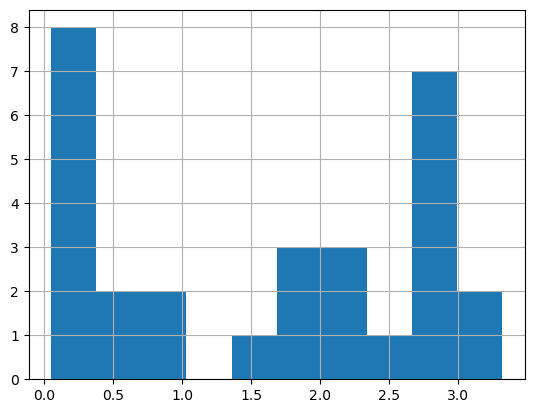

In [121]:
goal_df.value.hist()

In [122]:
goal_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
112,Raya,Brentford,1,0.0,50,0.0,166,0,0,12,46,0.11,0.12,0.23,50.12,Goalkeeper,3.320000
274,Leno,Fulham,1,0.0,45,0.0,142,0,0,8,51,0.00,0.00,0.00,62.75,Goalkeeper,3.155556
568,José Sá,Wolves,1,0.0,50,0.0,148,0,0,11,55,0.00,0.00,0.00,54.63,Goalkeeper,2.960000
290,Alisson,Liverpool,1,0.0,55,0.0,162,0,1,14,43,0.00,0.02,0.02,50.02,Goalkeeper,2.945455
16,Ramsdale,Arsenal,1,0.0,50,0.0,143,0,0,14,43,0.00,0.02,0.02,42.31,Goalkeeper,2.860000
423,Pope,Newcastle,1,0.0,55,0.0,157,0,0,14,32,0.00,0.01,0.01,39.44,Goalkeeper,2.854545
532,Fabianski,West Ham,1,0.0,45,0.0,127,0,0,9,48,0.00,0.00,0.00,45.55,Goalkeeper,2.822222
262,Pickford,Everton,1,0.0,45,0.0,124,0,1,8,57,0.00,0.35,0.35,66.41,Goalkeeper,2.755556
48,Martinez,Aston Villa,1,0.0,50,0.0,135,0,0,11,38,0.00,0.21,0.21,43.46,Goalkeeper,2.700000
186,Arrizabalaga,Chelsea,1,0.0,50,0.0,118,0,0,9,33,0.00,0.00,0.00,38.34,Goalkeeper,2.360000


<AxesSubplot:>

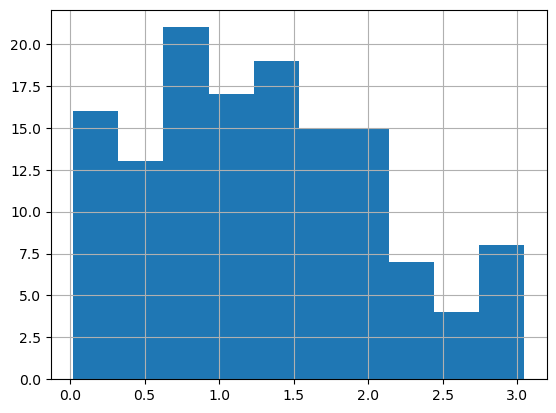

In [123]:
def_df.value.hist()

In [124]:
def_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
429,Trippier,Newcastle,2,0.0,65,0.0,198,1,9,16,31,0.85,12.03,12.88,38.41,Defender,3.046154
4,Gabriel,Arsenal,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000
50,Mings,Aston Villa,2,0.0,45,0.0,130,1,3,12,40,0.96,0.95,1.91,47.28,Defender,2.888889
406,Burn,Newcastle,2,0.0,45,0.0,129,1,0,14,30,2.12,1.28,3.40,36.33,Defender,2.866667
404,Botman,Newcastle,2,0.0,45,0.0,129,0,2,13,30,2.75,1.09,3.84,38.00,Defender,2.866667
108,Mee,Brentford,2,0.0,50,0.0,143,3,2,12,40,3.19,0.74,3.93,46.31,Defender,2.860000
28,White,Arsenal,2,0.0,55,0.0,156,2,5,15,35,1.25,3.60,4.85,37.23,Defender,2.836364
426,Schär,Newcastle,2,0.0,50,0.0,139,1,3,15,28,4.63,2.05,6.68,36.65,Defender,2.780000
130,Estupiñan,Brighton,2,0.0,50,0.0,128,1,7,10,43,1.80,3.88,5.68,41.60,Defender,2.560000
111,Pinnock,Brentford,2,0.0,45,0.0,112,3,0,10,34,2.73,1.11,3.84,40.17,Defender,2.488889


<AxesSubplot:>

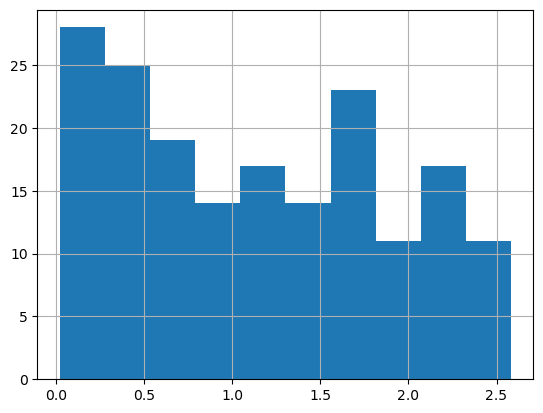

In [125]:
mid_df.value.hist()

In [126]:
mid_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
42,Douglas Luiz,Aston Villa,3,0.0,55,0.0,142,6,7,13,35,2.79,2.92,5.71,42.80,Midfielder,2.581818
29,Xhaka,Arsenal,3,0.0,60,0.0,153,7,8,13,35,4.65,3.89,8.54,36.52,Midfielder,2.550000
13,Ødegaard,Arsenal,3,0.0,85,0.0,212,15,8,13,38,9.75,8.02,17.77,37.94,Midfielder,2.494118
11,Martinelli,Arsenal,3,0.0,80,0.0,198,15,9,14,33,9.15,6.98,16.13,36.16,Midfielder,2.475000
133,Gross,Brighton,3,0.0,65,0.0,159,9,8,11,51,5.19,8.93,14.12,48.43,Midfielder,2.446154
225,Eze,Crystal Palace,3,0.0,65,0.0,159,10,5,9,35,7.25,2.92,10.17,32.64,Midfielder,2.446154
401,Almirón,Newcastle,3,0.0,65,0.0,158,11,4,15,22,8.03,3.00,11.03,28.35,Midfielder,2.430769
446,Gibbs-White,Nott'm Forest,3,0.0,60,0.0,145,5,12,8,61,6.77,6.06,12.83,57.88,Midfielder,2.416667
105,Jensen,Brentford,3,0.0,55,0.0,132,5,7,10,40,2.34,4.79,7.13,40.47,Midfielder,2.400000
18,Saka,Arsenal,3,0.0,85,0.0,202,14,12,12,42,11.49,5.97,17.46,39.66,Midfielder,2.376471


<AxesSubplot:>

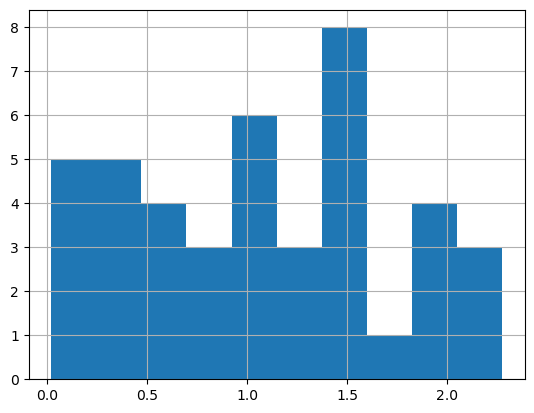

In [127]:
fwd_df.value.hist()

In [128]:
fwd_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
116,Toney,Brentford,4,0.0,80,0.0,182,20,4,10,42,18.74,3.72,22.46,43.65,Forward,2.275000
59,Watkins,Aston Villa,4,0.0,80,0.0,175,15,8,13,40,16.15,2.66,18.81,46.65,Forward,2.187500
499,Kane,Spurs,4,0.0,125,0.0,263,30,9,11,62,20.95,4.01,24.96,49.11,Forward,2.104000
84,Solanke,Bournemouth,4,0.0,65,0.0,130,6,10,8,52,9.09,2.30,11.39,51.51,Forward,2.000000
432,Wilson,Newcastle,4,0.0,80,0.0,157,18,6,10,16,16.43,2.11,18.54,21.93,Forward,1.962500
354,Haaland,Man City,4,0.0,140,0.0,272,36,9,13,26,28.54,3.11,31.65,25.24,Forward,1.942857
118,Wissa,Brentford,4,0.0,60,0.0,111,7,4,7,17,5.65,1.08,6.73,21.64,Forward,1.850000
534,Ings,West Ham,4,0.0,60,0.0,97,8,2,5,26,8.43,1.27,9.70,26.29,Forward,1.616667
342,J.Alvarez,Man City,4,0.0,65,0.0,103,9,3,5,16,6.79,1.63,8.42,17.14,Forward,1.584615
7,G.Jesus,Arsenal,4,0.0,80,0.0,125,11,7,9,23,14.24,2.91,17.15,23.15,Forward,1.562500


Key to winning sometimes is finding those key differentials. So let us look at some of the less-selected, value players.

In [129]:
diff = slim_elements_df.loc[slim_elements_df.selected_by_percent < '5']
diff

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
1,Cédric,Arsenal,2,0.0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83,Defender,0.250000
2,M.Elneny,Arsenal,3,0.0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29,Midfielder,0.133333
3,Fábio Vieira,Arsenal,3,0.0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28,Midfielder,0.727273
4,Gabriel,Arsenal,2,0.0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000
5,Havertz,Arsenal,3,0.0,75,0.0,102,7,1,9,31,11.58,2.75,14.33,38.25,Midfielder,1.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,José Sá,Wolves,1,0.0,50,0.0,148,0,0,11,55,0.00,0.00,0.00,54.63,Goalkeeper,2.960000
569,Sarabia,Wolves,3,0.0,50,0.0,27,1,0,3,9,2.99,0.89,3.88,13.37,Midfielder,0.540000
571,N.Semedo,Wolves,2,0.0,45,0.0,75,0,1,8,43,0.53,0.91,1.44,50.02,Defender,1.666667
572,Toti,Wolves,2,0.0,45,0.0,43,1,0,4,14,0.35,0.23,0.58,20.87,Defender,0.955556


There seems to be a problem with the 'selected_by_percent' column. There are some string values included within it. Lets try and fix it.

In [130]:
print(slim_elements_df.dtypes)

web_name                       object
team                           object
element_type                    int64
selected_by_percent            object
now_cost                        int64
value_season                   object
total_points                    int64
goals_scored                    int64
assists                         int64
clean_sheets                    int64
goals_conceded                  int64
expected_goals                 object
expected_assists               object
expected_goal_involvements     object
expected_goals_conceded        object
position                       object
value                         float64
dtype: object


In [131]:
slim_elements_df['selected_by_percent'] = pd.to_numeric(slim_elements_df['selected_by_percent'],errors='coerce')

In [132]:
slim_elements_df['selected_by_percent'] = slim_elements_df['selected_by_percent'].astype(int)

In [133]:
print(slim_elements_df.dtypes)

web_name                       object
team                           object
element_type                    int64
selected_by_percent             int32
now_cost                        int64
value_season                   object
total_points                    int64
goals_scored                    int64
assists                         int64
clean_sheets                    int64
goals_conceded                  int64
expected_goals                 object
expected_assists               object
expected_goal_involvements     object
expected_goals_conceded        object
position                       object
value                         float64
dtype: object


Data-type for the column now is int as required.

In [134]:
diff = slim_elements_df.loc[slim_elements_df.selected_by_percent < 5]
diff.sort_values('value', ascending = False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value
112,Raya,Brentford,1,0,50,0.0,166,0,0,12,46,0.11,0.12,0.23,50.12,Goalkeeper,3.320000
274,Leno,Fulham,1,0,45,0.0,142,0,0,8,51,0.00,0.00,0.00,62.75,Goalkeeper,3.155556
429,Trippier,Newcastle,2,0,65,0.0,198,1,9,16,31,0.85,12.03,12.88,38.41,Defender,3.046154
568,José Sá,Wolves,1,0,50,0.0,148,0,0,11,55,0.00,0.00,0.00,54.63,Goalkeeper,2.960000
290,Alisson,Liverpool,1,0,55,0.0,162,0,1,14,43,0.00,0.02,0.02,50.02,Goalkeeper,2.945455
4,Gabriel,Arsenal,2,0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000
50,Mings,Aston Villa,2,0,45,0.0,130,1,3,12,40,0.96,0.95,1.91,47.28,Defender,2.888889
404,Botman,Newcastle,2,0,45,0.0,129,0,2,13,30,2.75,1.09,3.84,38.00,Defender,2.866667
406,Burn,Newcastle,2,0,45,0.0,129,1,0,14,30,2.12,1.28,3.40,36.33,Defender,2.866667
108,Mee,Brentford,2,0,50,0.0,143,3,2,12,40,3.19,0.74,3.93,46.31,Defender,2.860000


Let us do a different kind of analysis. 
Introducting xG

In [135]:
slim_elements_df['expected_goals'] = pd.to_numeric(slim_elements_df['expected_goals'],errors='coerce')

slim_elements_df['expected_goals'] = slim_elements_df['expected_goals'].astype(float)

In [136]:
slim_elements_df['Goals-xG'] = slim_elements_df['goals_scored']-slim_elements_df['expected_goals']

In [137]:
slim_elements_df

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG
1,Cédric,Arsenal,2,0,40,0.0,10,0,0,0,3,0.06,0.19,0.25,2.83,Defender,0.250000,-0.06
2,M.Elneny,Arsenal,3,0,45,0.0,6,0,0,0,2,0.00,0.04,0.04,1.29,Midfielder,0.133333,0.00
3,Fábio Vieira,Arsenal,3,0,55,0.0,40,1,2,2,5,0.86,1.39,2.25,5.28,Midfielder,0.727273,0.14
4,Gabriel,Arsenal,2,0,50,0.0,146,3,0,14,43,5.04,0.66,5.70,41.84,Defender,2.920000,-2.04
5,Havertz,Arsenal,3,0,75,0.0,102,7,1,9,31,11.58,2.75,14.33,38.25,Midfielder,1.360000,-4.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,José Sá,Wolves,1,0,50,0.0,148,0,0,11,55,0.00,0.00,0.00,54.63,Goalkeeper,2.960000,0.00
569,Sarabia,Wolves,3,0,50,0.0,27,1,0,3,9,2.99,0.89,3.88,13.37,Midfielder,0.540000,-1.99
571,N.Semedo,Wolves,2,0,45,0.0,75,0,1,8,43,0.53,0.91,1.44,50.02,Defender,1.666667,-0.53
572,Toti,Wolves,2,0,45,0.0,43,1,0,4,14,0.35,0.23,0.58,20.87,Defender,0.955556,0.65


In [138]:
df_sorted = slim_elements_df.sort_values('Goals-xG', ascending=False)
df_sorted

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG
499,Kane,Spurs,4,0,125,0.0,263,30,9,11,62,20.95,4.01,24.96,49.11,Forward,2.104000,9.05
354,Haaland,Man City,4,0,140,0.0,272,36,9,13,26,28.54,3.11,31.65,25.24,Forward,1.942857,7.46
11,Martinelli,Arsenal,3,0,80,0.0,198,15,9,14,33,9.15,6.98,16.13,36.16,Midfielder,2.475000,5.85
352,Foden,Man City,3,0,75,0.0,142,11,7,5,16,5.75,4.73,10.48,17.62,Midfielder,1.893333,5.25
13,Ødegaard,Arsenal,3,0,85,0.0,212,15,8,13,38,9.75,8.02,17.77,37.94,Midfielder,2.494118,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Nketiah,Arsenal,4,0,55,0.0,63,4,2,2,16,7.89,1.26,9.15,14.65,Forward,1.145455,-3.89
245,Calvert-Lewin,Everton,4,0,60,0.0,40,2,1,4,22,5.90,0.72,6.62,23.13,Forward,0.666667,-3.90
257,Maupay,Everton,4,0,50,0.0,41,1,0,3,19,4.91,0.24,5.15,22.04,Forward,0.820000,-3.91
431,Willock,Newcastle,3,0,55,0.0,123,3,7,12,26,7.30,4.29,11.59,29.62,Midfielder,2.236364,-4.30


In [139]:
# Select the top 10 performing players
top_10_players = df_sorted.head(10)[::-1]

# Select the bottom 10 performing players
bottom_10_players = df_sorted.tail(10)[::-1]

In [140]:
import matplotlib.pyplot as plt

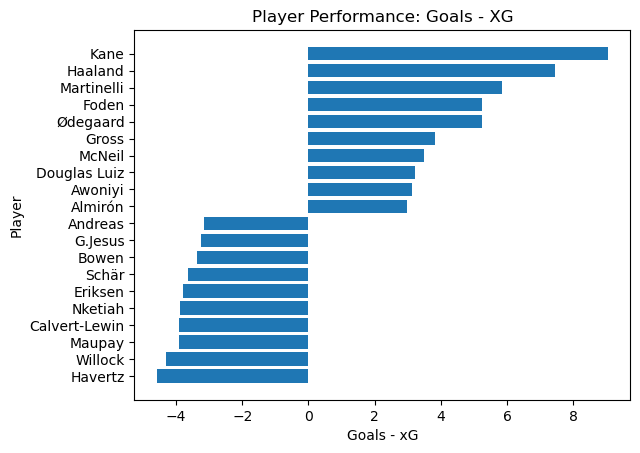

In [142]:
players_to_plot = pd.concat([bottom_10_players,top_10_players])

# Create the bar plot
plt.barh(players_to_plot['web_name'], players_to_plot['Goals-xG'])
plt.xlabel('Goals - xG')
plt.ylabel('Player')
plt.title('Player Performance: Goals - XG')

# Show the plot
plt.show()

As we can see, Kane out-perfomed his xG by a good amount. This was expected as he finished with 29 goals in a Spurs team which underperformed. Also, Havertz was the worst performing player according to this metric. He played in a Chelsea team that struggled for goals all season and he was one of the reasons why.

On the flipside, Barnes and Rodrigo Moreno will be players to watch next season if they are bought by any Premier League clubs as their respectively clubs couldn't avoid the drop even when they outperfomed their xG.

**We can do the same for assists**

In [143]:
slim_elements_df['expected_assists'] = pd.to_numeric(slim_elements_df['expected_assists'],errors='coerce')

slim_elements_df['expected_assists'] = slim_elements_df['expected_assists'].astype(float)

slim_elements_df['assists'] = pd.to_numeric(slim_elements_df['assists'],errors='coerce')

slim_elements_df['assists'] = slim_elements_df['assists'].astype(float)

In [144]:
slim_elements_df['Assists-xA'] = slim_elements_df['assists']-slim_elements_df['expected_assists']

In [145]:
df_sorted_ = slim_elements_df.sort_values('Assists-xA', ascending=False)
df_sorted_

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
84,Solanke,Bournemouth,4,0,65,0.0,130,6,10.0,8,52,9.09,2.30,11.39,51.51,Forward,2.000000,-3.09,7.70
25,Trossard,Arsenal,3,0,70,0.0,154,8,13.0,8,38,6.37,6.02,12.39,30.79,Midfielder,2.200000,1.63,6.98
358,Mahrez,Man City,3,0,75,0.0,126,5,12.0,6,23,5.40,5.22,10.62,18.28,Midfielder,1.680000,-0.40,6.78
18,Saka,Arsenal,3,0,85,0.0,202,14,12.0,12,42,11.49,5.97,17.46,39.66,Midfielder,2.376471,2.51,6.03
307,Salah,Liverpool,3,0,125,0.0,239,19,13.0,13,45,21.01,7.03,28.04,47.47,Midfielder,1.912000,-2.01,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Mac Allister,Liverpool,3,0,60,0.0,140,10,2.0,10,45,12.05,4.27,16.32,40.48,Midfielder,2.333333,-2.05,-2.27
294,Elliott,Liverpool,3,0,50,0.0,62,1,2.0,5,20,2.12,4.31,6.43,26.07,Midfielder,1.240000,-1.12,-2.31
252,Gray,Everton,3,0,55,0.0,91,4,1.0,7,39,6.17,3.82,9.99,46.59,Midfielder,1.654545,-2.17,-2.82
230,Lerma,Crystal Palace,3,0,50,0.0,101,5,0.0,7,67,2.58,3.00,5.58,60.57,Midfielder,2.020000,2.42,-3.00


In [146]:
df_sorted_.dropna()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
84,Solanke,Bournemouth,4,0,65,0.0,130,6,10.0,8,52,9.09,2.30,11.39,51.51,Forward,2.000000,-3.09,7.70
25,Trossard,Arsenal,3,0,70,0.0,154,8,13.0,8,38,6.37,6.02,12.39,30.79,Midfielder,2.200000,1.63,6.98
358,Mahrez,Man City,3,0,75,0.0,126,5,12.0,6,23,5.40,5.22,10.62,18.28,Midfielder,1.680000,-0.40,6.78
18,Saka,Arsenal,3,0,85,0.0,202,14,12.0,12,42,11.49,5.97,17.46,39.66,Midfielder,2.376471,2.51,6.03
307,Salah,Liverpool,3,0,125,0.0,239,19,13.0,13,45,21.01,7.03,28.04,47.47,Midfielder,1.912000,-2.01,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Mac Allister,Liverpool,3,0,60,0.0,140,10,2.0,10,45,12.05,4.27,16.32,40.48,Midfielder,2.333333,-2.05,-2.27
294,Elliott,Liverpool,3,0,50,0.0,62,1,2.0,5,20,2.12,4.31,6.43,26.07,Midfielder,1.240000,-1.12,-2.31
252,Gray,Everton,3,0,55,0.0,91,4,1.0,7,39,6.17,3.82,9.99,46.59,Midfielder,1.654545,-2.17,-2.82
230,Lerma,Crystal Palace,3,0,50,0.0,101,5,0.0,7,67,2.58,3.00,5.58,60.57,Midfielder,2.020000,2.42,-3.00


In [147]:
# Select the top 10 performing players
top_10_players = df_sorted_.head(12)[::-1]

# Select the bottom 10 performing players
bottom_10_players = df_sorted_.tail(12)[::-1]

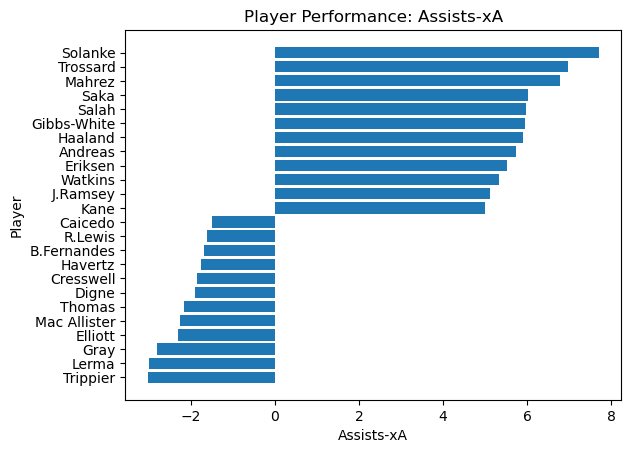

In [148]:
players_to_plot = pd.concat([bottom_10_players,top_10_players])

# Create the bar plot
plt.barh(players_to_plot['web_name'], players_to_plot['Assists-xA'])
plt.xlabel('Assists-xA')
plt.ylabel('Player')
plt.title('Player Performance: Assists-xA')

# Show the plot
plt.show()

**Dominic Solanke!!** Now that is surprising. This stat reminds me of THAT Busquets assist for Messi in the UCL Semi-final. I wonder what the xA for that would have been. \
Haaland is there as well. He has out-performed in both Goals and Assists. Lets see if he can replicate this kind of a season again. 

Bruno Fernandes is there in the underperforming range. He has been one of the most creative players but with only Rashford to score most of the goals, his Assists numbers are down. \
However, Eriksen(teammate of Bruno) has outperfomed his xA, maybe because he takes a lot of set-pieces which have lead to goals thanks to Casemiero(mostly)

In [150]:
df_sorted_[df_sorted_['web_name']=='Haaland']

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,goals_scored,assists,clean_sheets,goals_conceded,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,position,value,Goals-xG,Assists-xA
354,Haaland,Man City,4,0,140,0.0,272,36,9.0,13,26,28.54,3.11,31.65,25.24,Forward,1.942857,7.46,5.89


In [77]:
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

def optimize_team(df):
    # Create a linear optimization problem
    prob = LpProblem("TeamOptimization", LpMaximize)
    
    # Extract player information from the dataframe
    players = df['second_name'].tolist()
    costs = df['now_cost'].tolist()
    points = df['total_points'].tolist()
    positions = df['position'].tolist()
    teams = df['team'].tolist()
    
    # Define the decision variables
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    # Define the objective function (to maximize points)
    prob += lpSum([player_vars[player] * point for player, point in zip(players, points)])
    
    # Add the constraints
    
    # Constraint: Total cost should be less than or equal to 75
    prob += lpSum([player_vars[player] * cost for player, cost in zip(players, costs)]) <= 75, "TotalCost"
    
    # Constraint: Select exactly 11 players
    prob += lpSum([player_vars[player] for player in players]) == 11, "TotalPlayers"
    
    # Constraint: Maximum of 4 defenders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Defender']) == 4, "MaxDefenders"
    
    # Constraint: Maximum of 3 midfielders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Midfielder']) == 3, "MaxMidfielders"
    
    # Constraint: Maximum of 3 attackers
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Attacker']) == 3, "MaxAttackers"
    
    # Constraint: Exactly 1 goalkeeper
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'Goalkeeper']) == 1, "Goalkeeper"
    
    # Solve the problem
    prob.solve()
    
    # Extract the optimal team
    optimal_team = [player for player in players if value(player_vars[player]) > 0.5]
    
    # Calculate the total cost and points
    total_cost = sum([cost for player, cost in zip(players, costs) if player in optimal_team])
    total_points = sum([point for player, point in zip(players, points) if player in optimal_team])
    
    # Create a dataframe for the selected players
    selected_players = pd.DataFrame({
        'Player': optimal_team,
        'Cost': [cost for player, cost in zip(players, costs) if player in optimal_team],
        'Points': [point for player, point in zip(players, points) if player in optimal_team]
    })
    
    # Print the total cost, total points, and the selected players
    print(f"Total Cost: {total_cost}")
    print(f"Total Points: {total_points}")
    print("Selected Players:")
    print(selected_players)




Total Cost: 1250
Total Points: 416
Selected Players:
               Player  Cost  Points
0        Alves Soares    40      10
1            Chambers    40      13
2             Pearson    45       9
3             Travers    40      28
4            Baptiste    45      29
5       Bech Sørensen    40       4
6             Lamptey    40      23
7   Sarmiento Morante    45      16
8           van Hecke    40       6
9         Chukwuemeka    45      18
10            Ahamada    45       7
11           Richards    40      13
12            Tomkins    40       8
13            Holgate    40      16
14              Lukić    45      15
15              Mbabu    40       7
16              Lewis    45      29
17      Ortega Moreno    40      23
18              Gómez    40      21
19           Anderson    45      30
20           Dubravka    40      11
21          Lascelles    40       3
22              Lewis    40       2
23   Manquillo Gaitán    40       4
24            Ritchie    45       7
25         

In [92]:
import pandas as pd
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, value

def optimize_team(df):
    # Create a linear optimization problem
    prob = LpProblem("TeamOptimization", LpMaximize)
    
    # Extract player information from the dataframe
    players = df['second_name'].tolist()
    costs = df['now_cost'].tolist()
    points = df['total_points'].tolist()
    positions = df['position'].tolist()
    teams = df['team'].tolist()
    
    # Define the decision variables
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    # Define the objective function (to maximize points)
    prob += lpSum([player_vars[player] * point for player, point in zip(players, points)])
    
    # Add the constraints
    
    # Constraint: Total cost should be less than or equal to 90
    prob += lpSum([player_vars[player] * cost for player, cost in zip(players, costs)]) <= 85, "TotalCost"
    
    # Constraint: Select exactly 13 players
    prob += lpSum(player_vars) == 11, "TotalPlayers"
    
    # Constraint: Minimum of 4 defenders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'DEF']) == 3, "MinDefenders"
    
    # Constraint: Exactly 3 attackers
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'FWD']) == 3, "Attackers"
    
    # Constraint: Exactly 4 midfielders
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'MID']) == 3, "Midfielders"
    
    # Constraint: Exactly 1 goalkeeper
    prob += lpSum([player_vars[player] for player, position in zip(players, positions) if position == 'GK']) == 1, "Goalkeeper"
    
    # Constraint: No more than 3 players from a single team
    for team in set(teams):
        prob += lpSum([player_vars[player] for player, team_id in zip(players, teams) if team_id == team]) <= 3, f"MaxPlayersPerTeam_{team}"
    
    # Solve the problem
    prob.solve()
    
    # Extract the optimal team
    optimal_team = [player for player in players if value(player_vars[player]) > 0]
    
    # Calculate the total cost and points
    total_cost = sum([cost for player, cost in zip(players, costs) if player in optimal_team])
    total_points = sum([point for player, point in zip(players, points) if player in optimal_team])
    
    # Create a dataframe for the selected players
    selected_players = pd.DataFrame({
        'Player': optimal_team,
        'Cost': [cost for player, cost in zip(players, costs) if player in optimal_team],
        'Points': [point for player, point in zip(players, points) if player in optimal_team]
    })
    
    # Print the total cost, total points, and the selected players
    print(f"Total Cost: {total_cost}")
    print(f"Total Points: {total_points}")
    print("Selected Players:")
    print(selected_players)

In [168]:
df.shape

(385, 21)

In [169]:
def select_team(expected_scores, prices, positions, clubs, total_budget=100, sub_factor=0.2):
    num_players = 385
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]


    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + sub_decisions[i]*sub_factor) * expected_scores[i]
                 for i in range(num_players)), "Objective"

    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost

    # position constraints
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2

    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) <= 5
    # 5 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5

    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5

    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) <= 3
    # 3 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3

    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players

    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    model.solve()
    print("Total expected score = {}".format(model.objective.value()))

    return decisions, captain_decisions, sub_decisions

In [170]:
df = slim_elements_df
expected_scores = df['total_points']
prices = df['now_cost']/10
positions = df['position']
teams = df['team']
names = df['web_name']

1       10
2        6
3       40
4      146
5      102
      ... 
568    148
569     27
571     75
572     43
573     14
Name: total_points, Length: 385, dtype: int64

In [154]:
def convert_to_numerical_category(obj_list):
    # Create a dictionary to store the mapping of objects to numerical categories
    category_mapping = {}
    numerical_category = 0
    
    # Initialize an empty list to store the numerical categories
    numerical_categories = []
    
    # Iterate over the objects in the list
    for obj in obj_list:
        # Check if the object is already assigned a numerical category
        if obj in category_mapping:
            # If so, append the existing numerical category to the list
            numerical_categories.append(category_mapping[obj])
        else:
            # If not, assign a new numerical category and update the mapping
            category_mapping[obj] = numerical_category
            numerical_categories.append(numerical_category)
            numerical_category += 1
    
    return numerical_categories


In [171]:
df['positions_'] = convert_to_numerical_category(positions)
df['clubs'] = convert_to_numerical_category(teams)

In [172]:
positions_ = df['positions_']
clubs = df['clubs']

In [174]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/players_raw.csv"
)
expected_scores = df["total_points"] / 38  # penalises players who played fewer games
prices = df["now_cost"] / 10
positions = df["element_type"]
clubs = df["team_code"]
# so we can read the results
names = df["first_name"] + " " + df["second_name"]

decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values)
player_indices = []

print()
print("First Team:")
for i in range(len(decisions)):
    if decisions[i].value() == 1:
        print("{}{}".format(names[i], "*" if captain_decisions[i].value() == 1 else ""))
        player_indices.append(i)
print()
print("Subs:")
for i in range(len(sub_decisions)):
    if sub_decisions[i].value() == 1:
        print(names[i])
        player_indices.append(i)

C:\Users\SOBAN\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 56.98947368421053

First Team:
Martin Ødegaard*
Bukayo Saka
Gabriel Martinelli Silva
Tyrone Mings
Ollie Watkins
Ivan Toney
David Raya Martin
Ben Mee
Pascal Groß
Pervis Estupiñán
Eberechi Eze

Subs:
Dominic Solanke
Lewis Dunk
Bernd Leno
Timothy Castagne
